In [1]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# 나무 구조 시각화
from sklearn.tree import plot_tree

In [3]:
# 데이터 불러오기

df_raw = pd.read_csv('data/body.csv')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [4]:
df_raw_y = df_raw['FAT']
df_raw_x = df_raw.drop(columns = 'FAT', inplace = False)

In [5]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state=1234)

print('학습용 데이터의 X 크기: {}'.format(df_train_x.shape))
print('학습용 데이터의 Y 크기: {}'.format(df_train_y.shape))
print('평가용 데이터의 X 크기: {}'.format(df_test_x.shape))
print('평가용 데이터의 X 크기: {}'.format(df_test_y.shape))

학습용 데이터의 X 크기: (176, 13)
학습용 데이터의 Y 크기: (176,)
평가용 데이터의 X 크기: (76, 13)
평가용 데이터의 X 크기: (76,)


In [6]:
# 기본 모델 생성

rf_uncustomized = RandomForestRegressor(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)

RandomForestRegressor(random_state=1234)

In [8]:
# 데이터 설명력

print('학습용 데이터의 모델 설명력: {:.3f}'.format(rf_uncustomized.score(df_train_x, df_train_y)))
print('평가용 데이터의 모델 설명력: {:.3f}'.format(rf_uncustomized.score(df_test_x, df_test_y)))   

학습용 데이터의 모델 설명력: 0.956
평가용 데이터의 모델 설명력: 0.612


###### 모델 파라미터 조정 : Manual Search
- n_estimators

In [9]:
# train 및 test 설명력 결과 저장
train_score = []
test_score = []

# n_estimators 트리 수 변경, 10 ~ 100
para_n_tree = [n_tree * 10 for n_tree in range(1, 11)] # para_n_tree = [10, 20 30, ... 100]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators=v_n_estimators, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_n = pd.DataFrame()
df_score_n['n_estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score

In [10]:
# 모델 설명력 확인
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.936,0.542
1,20,0.946,0.597
2,30,0.952,0.610
3,40,0.955,0.609
4,50,0.955,0.611
5,60,0.956,0.616
6,70,0.955,0.614
7,80,0.955,0.611
8,90,0.956,0.610
9,100,0.956,0.612


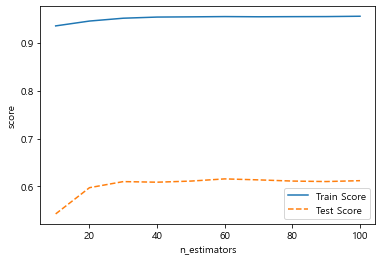

In [11]:
# 모델 설명력 그래프로 확인
plt.plot(para_n_tree, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_n_tree, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('score')
plt.xlabel('n_estimators')
plt.legend()

###### 모델 파라미터 조정 : Manual Search
- min_samples_leaf

In [12]:
# train 및 test 설명력 결과 저장
train_score = []
test_score = []

# n_estimators 트리 수 변경, 10 ~ 100
para_leaf = [n_leaf for n_leaf in range(1, 21)] # para_n_tree = [1, 2, 3, 4, ..., 20]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(min_samples_leaf= v_min_samples_leaf, random_state=1234, n_estimators = 100)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

In [13]:
# 모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.956,0.612
1,2,0.939,0.610
2,3,0.915,0.611
3,4,0.891,0.617
4,5,0.869,0.622
5,6,0.849,0.627
6,7,0.830,0.626
7,8,0.816,0.621
8,9,0.800,0.619
9,10,0.786,0.619


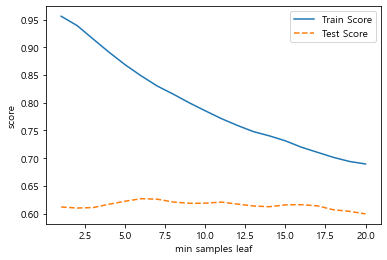

In [14]:
# 모델 설명력 그래프로 확인
plt.plot(para_leaf, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('score')
plt.xlabel('min samples leaf')
plt.legend()

###### 모델 파라미터 조정 : Manual Search
- min_samples_split

In [15]:
# train 및 test 설명력 결과 저장
train_score = []
test_score = []


para_split = [n_split * 2 for n_split in range(2, 21)] # para_n_tree = [4, 6, 8, ..., 40]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(min_samples_leaf= 6, random_state=1234, n_estimators = 100, min_samples_split = v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_split = pd.DataFrame()
df_score_split['MinSamplesLeaf'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

In [16]:
# 모델 설명력 확인
df_score_split.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,4,0.849,0.627
1,6,0.849,0.627
2,8,0.849,0.627
3,10,0.849,0.627
4,12,0.849,0.627
5,14,0.839,0.629
6,16,0.831,0.629
7,18,0.821,0.628
8,20,0.813,0.628
9,22,0.803,0.628


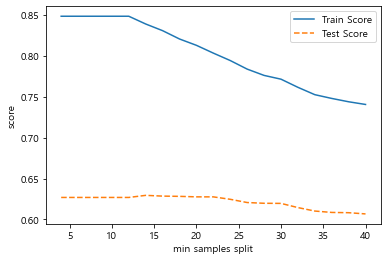

In [17]:
# 모델 설명력 그래프로 확인
plt.plot(para_split, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_split, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('score')
plt.xlabel('min samples split')
plt.legend()

###### 모델 파라미터 조정 : Manual Search
- max_depth

In [18]:
# train 및 test 설명력 결과 저장
train_score = []
test_score = []


para_depth = [depth for depth in range(1, 11)] # para_n_tree = [1, 2, 3, 4, ..., 10]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(min_samples_leaf= 6, random_state=1234, n_estimators = 100, min_samples_split=14, max_depth= v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_depth = pd.DataFrame()
df_score_depth['MinSamplesLeaf'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

In [19]:
# 모델 설명력 확인
df_score_depth.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.557,0.448
1,2,0.721,0.598
2,3,0.789,0.620
3,4,0.825,0.627
4,5,0.837,0.631
5,6,0.839,0.629
6,7,0.839,0.629
7,8,0.839,0.629
8,9,0.839,0.629
9,10,0.839,0.629


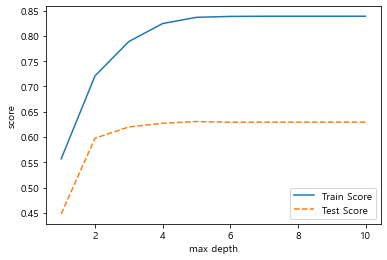

In [20]:
# 모델 설명력 그래프로 확인
plt.plot(para_depth, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_depth, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('score')
plt.xlabel('max depth')
plt.legend()

In [31]:
manual_dt = RandomForestRegressor(min_samples_leaf= 6, random_state=1234, n_estimators = 100, min_samples_split = 14, max_depth = 4)
manual_dt.fit(df_train_x, df_train_y)

RandomForestRegressor(max_depth=4, min_samples_leaf=6, min_samples_split=14,
                      random_state=1234)

In [32]:
manual_dt.score(df_train_x, df_train_y)

0.8245945310440619

In [33]:
manual_dt.score(df_test_x, df_test_y)

0.6272281414182838

###### GridSearch 사용하여 최적의 파라미터 찾기

In [25]:
estimator = RandomForestRegressor(random_state=1234)

# 구하고자 하는 parameter 범위
param_grid = {'n_estimators': para_n_tree, 'max_depth': para_depth, 'min_samples_split': para_split, 'min_samples_leaf': para_leaf}

# 설명력(r2)이 높은 최적parameter 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring = 'r2', n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print('best estimator model: \n{}'.format(grid_dt.best_estimator_))
print('\nbest parameter: \n{}'.format(grid_dt.best_params_))
print('\nbest score: \n{}'.format(grid_dt.best_score_.round(3)))

best estimator model: 
RandomForestRegressor(max_depth=7, min_samples_leaf=3, min_samples_split=18,
                      n_estimators=30, random_state=1234)

best parameter: 
{'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 18, 'n_estimators': 30}

best score: 
0.682


In [26]:
grid_dt.score(df_train_x, df_train_y)

0.8396801588895763

In [27]:
grid_dt.score(df_test_x, df_test_y)

0.617123559099447

###### RandomSearch 사용하여 최적의 파라미터 찾기

In [28]:
estimator = RandomForestRegressor(random_state = 1234)

# 구하고자 하는 파라미터와 범위
param_grid = {'n_estimators': para_n_tree, 'max_depth': para_depth,
             'min_samples_split': para_split, 'min_samples_leaf': para_leaf}

# 설명력이 높은 최적 파라미터 찾기
random_dt = RandomizedSearchCV(estimator, param_grid, scoring = 'r2', n_jobs= -1)
random_dt.fit(df_train_x, df_train_y)

print('best estimator model: \n{}'.format(random_dt.best_estimator_))
print('\nbest parameter: \n{}'.format(random_dt.best_params_))
print('\nbest score: \n{}'.format(random_dt.best_score_.round(3)))

best estimator model: 
RandomForestRegressor(max_depth=5, min_samples_split=18, n_estimators=40,
                      random_state=1234)

best parameter: 
{'n_estimators': 40, 'min_samples_split': 18, 'min_samples_leaf': 1, 'max_depth': 5}

best score: 
0.673


In [29]:
random_dt.score(df_train_x, df_train_y)

0.8405524316405154

In [30]:
random_dt.score(df_test_x, df_test_y)

0.6163813690692603

In [34]:
# 최적 parameter 설정 후 최종 모델 생성

rf_final = RandomForestRegressor(min_samples_leaf= 6, random_state=1234, n_estimators = 100, min_samples_split = 14, max_depth = 4)
rf_final.fit(df_train_x, df_train_y)

print('Score on training set: {:.3f}'.format(rf_final.score(df_train_x, df_train_y)))
print('Score on test set: {:.3f}'.format(rf_final.score(df_test_x, df_test_y)))

Score on training set: 0.825
Score on test set: 0.627


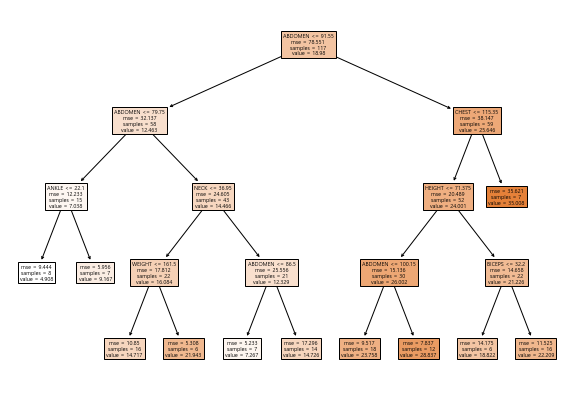

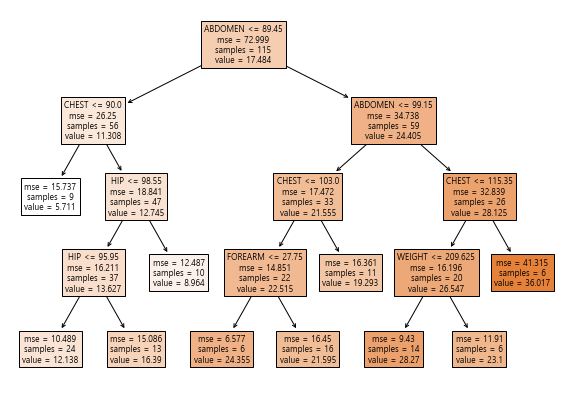

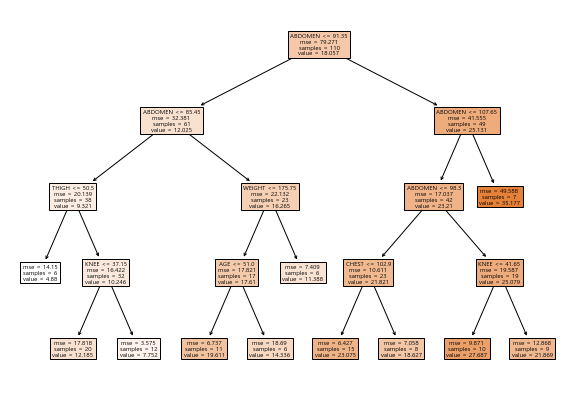

In [36]:
# plot tree 시각화

v_feature_name = df_train_x.columns

plt.figure(figsize = (10, 7))
plot_tree(rf_final.estimators_[0], feature_names= v_feature_name, filled = True)
plt.figure(figsize = (10, 7))
plot_tree(rf_final.estimators_[1], feature_names= v_feature_name, filled = True)
plt.figure(figsize = (10, 7))
plot_tree(rf_final.estimators_[10], feature_names= v_feature_name, filled = True);

# 실습 데이터로 진행해보기

In [37]:
tire = pd.read_csv('data/tire_heat.csv')
tire.head()

,Y,Weight,Velocity,Shoulder,Temperature,Time
0,98,70,70,36.5,36,5
1,80,70,70,36.0,36,6
2,113,70,90,37.0,37,6
3,100,70,90,36.3,37,6
4,103,70,110,36.5,39,4


In [38]:
df_tire_y = tire['Y']
df_tire_x = tire.drop(columns = 'Y', inplace = False)

In [39]:
tire_train_x, tire_test_x, tire_train_y, tire_test_y = train_test_split(df_tire_x, df_tire_y, test_size = 0.3, random_state=1234)

print('학습용 데이터의 X 크기: {}'.format(tire_train_x.shape))
print('학습용 데이터의 Y 크기: {}'.format(tire_train_y.shape))
print('평가용 데이터의 X 크기: {}'.format(tire_test_x.shape))
print('평가용 데이터의 X 크기: {}'.format(tire_test_y.shape))

학습용 데이터의 X 크기: (277, 5)
학습용 데이터의 Y 크기: (277,)
평가용 데이터의 X 크기: (119, 5)
평가용 데이터의 X 크기: (119,)


In [40]:
# 기본 모델 생성

uncustomized_tire = RandomForestRegressor(random_state = 1234)
uncustomized_tire.fit(tire_train_x, tire_train_y)

RandomForestRegressor(random_state=1234)

In [41]:
para_n_tree = list(range(10, 110, 10)) 
para_depth = list(range(1, 20))
para_split = list(range(2, 20, 2))
para_leaf = list(range(1, 20))

In [42]:
estimator = RandomForestRegressor(random_state = 1234)

# 구하고자 하는 파라미터와 범위
param_grid = {'n_estimators': para_n_tree, 'max_depth': para_depth,
             'min_samples_split': para_split, 'min_samples_leaf': para_leaf}

# 설명력이 높은 최적 파라미터 찾기
random_tire = RandomizedSearchCV(estimator, param_grid, scoring = 'r2', n_jobs= -1)
random_tire.fit(tire_train_x, tire_train_y)

print('best estimator model: \n{}'.format(random_tire.best_estimator_))
print('\nbest parameter: \n{}'.format(random_tire.best_params_))
print('\nbest score: \n{}'.format(random_tire.best_score_.round(3)))

best estimator model: 
RandomForestRegressor(max_depth=10, min_samples_leaf=3, min_samples_split=4,
                      n_estimators=90, random_state=1234)

best parameter: 
{'n_estimators': 90, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_depth': 10}

best score: 
0.932


In [43]:
random_tire.score(tire_train_x, tire_train_y)

0.9450294135226674

In [44]:
random_tire.score(tire_test_x, tire_test_y)

0.934978475780297